## Observations and Insights 
## Observation 1 : the gender representation of the mice is perfectly distributed with a 51% male and 49% female ratio 
## Observation 2 : By conducting an analysis of the statistics in regrads to the tumor volume shown by drug regimen we can see that the average tumor volume for those under the capomulin treatment is smaller than it is for the rest of the drug regimens studied. 
## Observation 3: We are able to see a positive, and strong correlation that exists between the weight of the mouse and the volume of the tumor. The more weight there is, the bigger the volume will be.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# mouse data
mouse_data = pd.read_csv("Resources/Mouse_metadata.csv")
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# results data
results_data = pd.read_csv("Resources/Study_results.csv")
results_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_data,results_data, on = "Mouse ID")

In [5]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].unique()
mice_unique = len(mice)
print(mice_unique)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
mice = clean_study_data["Mouse ID"].unique()
mice_unique = len(mice)
print(mice_unique)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_study_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_study_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_study_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_dev = clean_study_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = clean_study_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [11]:
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_dev,
    "SEM": SEM
})
summary_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_study_data.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)":[np.mean, np.median, np.var, np.std, st.sem]})
summary_stats_agg.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'numer of measurements')

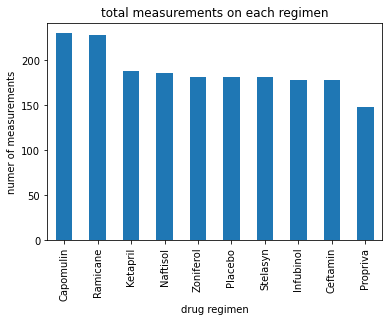

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_mea = clean_study_data["Drug Regimen"].value_counts()
total_mea_plot = total_mea.plot (kind = "bar", title = "total measurements on each regimen")
total_mea_plot.set_xlabel("drug regimen")
total_mea_plot.set_ylabel("numer of measurements")

Text(0, 0.5, 'numer of measurements')

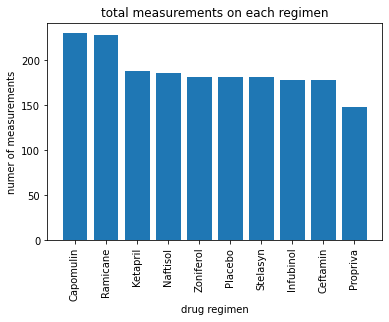

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(total_mea.index, total_mea)
plt.title("total measurements on each regimen")
plt.xticks(rotation = 90)
plt.xlabel("drug regimen")
plt.ylabel("numer of measurements")

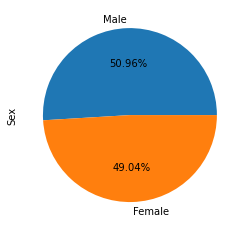

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = clean_study_data["Sex"].value_counts()
gender_dist_pie = gender_dist.plot(kind = "pie",autopct='%1.2f%%')

Text(0, 0.5, 'Sex')

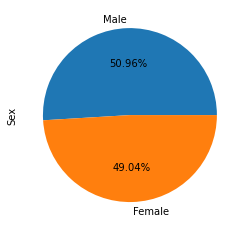

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist, labels = gender_dist.index, autopct='%1.2f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
total_tumor_vol = clean_study_data.sort_values("Mouse ID")
total_tumor_vol = total_tumor_vol.groupby(["Mouse ID","Drug Regimen"])
total_tumor_vol = total_tumor_vol['Tumor Volume (mm3)'].sum().to_frame(name = 'Tumor Volume (mm3)').reset_index()
total_tumor_vol                                  

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,563.127077
1,a251,Infubinol,552.370946
2,a262,Placebo,586.116306
3,a275,Ceftamin,527.709651
4,a366,Stelasyn,382.479341
...,...,...,...
243,z435,Propriva,140.826641
244,z578,Ramicane,384.115100
245,z581,Infubinol,539.795837
246,z795,Naftisol,548.803167


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_study_data.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = max_timepoint.merge(clean_study_data,on=["Mouse ID","Timepoint"],how="left")

In [20]:
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    # 25th percentile and 75th percentile
    q1 = final_tumor_vol.quantile(q= 0.25)
    q3 = final_tumor_vol.quantile(q= 0.75)
    
    # Interquartile Range
    iqr = q3 - q1
    
    # Min/Max bounds
    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr
    
    # Printing Results
    print('Minimum:', minimum)
    print('Maximum:', maximum)
    print('Q1:', q1)
    print('Q3:', q3)

Minimum: 20.70456164999999
Maximum: 51.83201549
Q1: 32.37735684
Q3: 40.1592203
Minimum: 17.912664470000003
Maximum: 54.30681135
Q1: 31.56046955
Q3: 40.65900627
Minimum: 36.83290494999999
Maximum: 82.74144559000001
Q1: 54.04860769
Q3: 65.52574285
Minimum: 25.355449580000002
Maximum: 87.66645829999999
Q1: 48.72207785
Q3: 64.29983003


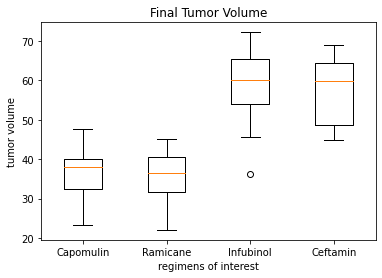

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.title("Final Tumor Volume")
plt.xlabel("regimens of interest")
plt.ylabel("tumor volume")
plt.show()

## Line and Scatter Plots

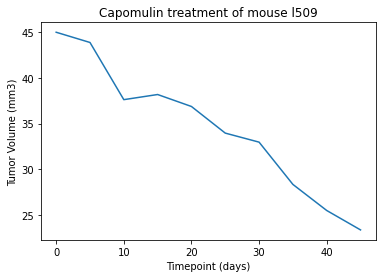

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_data.loc[capomulin_data['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

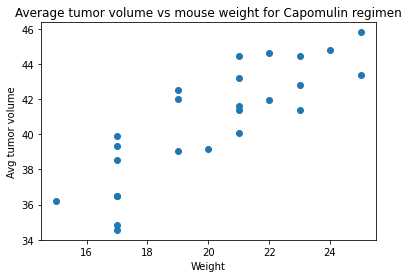

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_study_data.loc[clean_study_data['Drug Regimen'] == "Capomulin"]
capomulin_mean = capomulin_table.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Avg tumor volume")
plt.title("Average tumor volume vs mouse weight for Capomulin regimen")
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_mean["Weight (g)"]
tumor_vol = capomulin_mean["Tumor Volume (mm3)"]

corr=round(st.pearsonr(weight,tumor_vol)[0],2)
print(f"Correlation between weight & tumor volume is {corr}")

Correlation between weight & tumor volume is 0.84


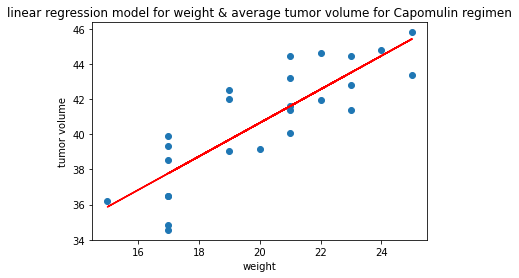

In [29]:
slope, int, r, p, std_err = st.linregress(weight,tumor_vol)
fit = slope * weight + int
plt.plot(weight,fit, color = "red")
plt.xlabel("weight")
plt.ylabel("tumor volume")
plt.title("linear regression model for weight & average tumor volume for Capomulin regimen")
plt.scatter(weight, tumor_vol)